In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()
sns.set(font_scale=2)
sns.set_context("talk")

from sklearn.linear_model import HuberRegressor, LinearRegression, RANSACRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from rdkit.Chem import PandasTools

RDKit WARNING: [18:42:21] Enabling RDKit 2019.09.3 jupyter extensions


# Figure S1

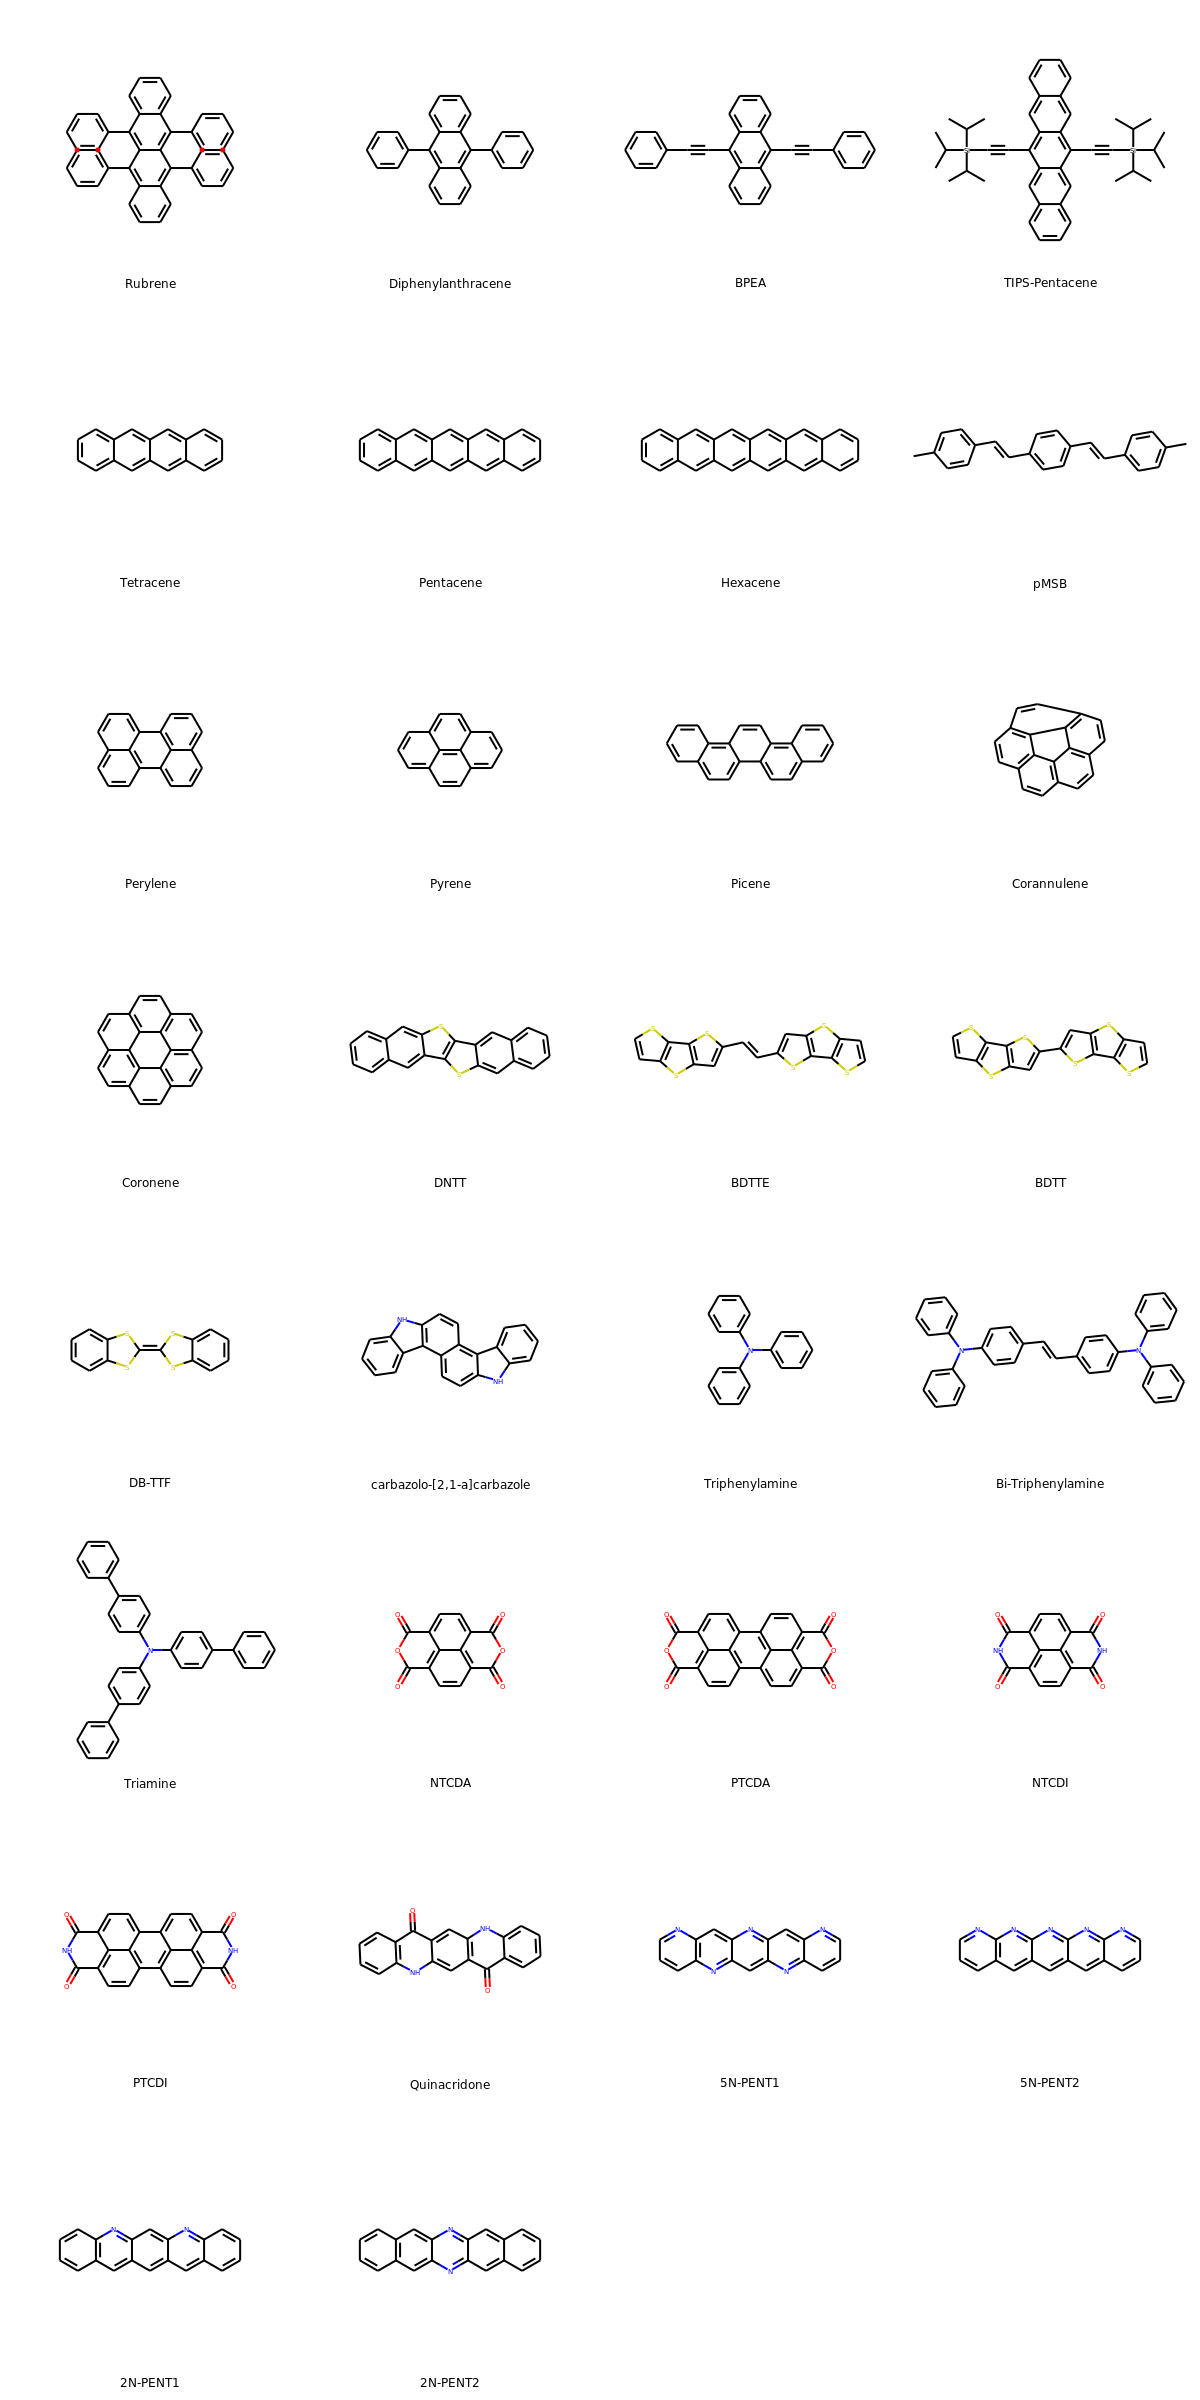

In [2]:
df_typical=pd.read_csv("../data/df_typical_oscs.csv")
PandasTools.AddMoleculeColumnToFrame(df_typical, smilesCol='smiles')
PandasTools.FrameToGridImage( df_typical, subImgSize=(300,300), molsPerRow=4, legendsCol="Name_system" )

# Figure S4

Coef 1.45075200766124, Intercept: 28.00075485127735
R2 -0.6125823583974179
No out 0.9090385282098049


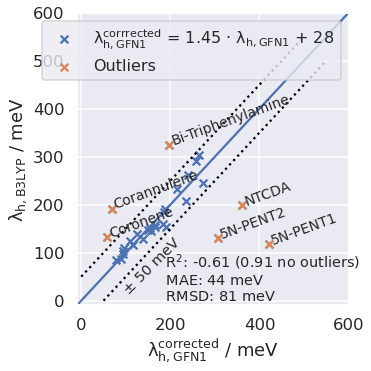

In [3]:
field_b3lyp="lambda_b3lyp"
field_xtb_gfn1="lambda_xtb_gfn1"

lr=RANSACRegressor(min_samples=20, residual_threshold=50)
lr.fit(df_typical[field_xtb_gfn1].values.reshape(-1, 1), 
       df_typical[field_b3lyp].values.reshape(-1, 1))
coef_2=float(lr.estimator_.coef_)
intercept_2=float(lr.estimator_.intercept_)
print('Coef {}, Intercept: {}'.format(coef_2,intercept_2))
print("R2",lr.score(df_typical[field_xtb_gfn1].values.reshape(-1, 1), 
               df_typical[field_b3lyp].values.reshape(-1, 1)))

inlier_mask = lr.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(5.5,5.5))
label='$\mathrm{\lambda_{h, GFN1}^{corrrected}}$ = ' + '{0:2.2f}'.format(coef_2) + \
      ' $\mathrm{\cdot}$ $\mathrm{\lambda_{h, GFN1}}$' + ' + {0:2.0f}'.format(intercept_2)


plt.scatter(lr.predict( df_typical[field_xtb_gfn1].values.reshape(-1, 1) ) , 
            df_typical[field_b3lyp].values.reshape(-1, 1), 
                       label=label, s=60, marker='x')
plt.scatter(lr.predict( df_typical.iloc[outlier_mask][field_xtb_gfn1].values.reshape(-1, 1) ) , 
            df_typical[field_b3lyp].iloc[outlier_mask].values.reshape(-1, 1), 
                       s=60, marker='x', label='Outliers')

df_outliers=df_typical.iloc[outlier_mask]

for i,row in df_outliers.iterrows():
    plt.text(lr.predict(np.array([row[field_xtb_gfn1]]).reshape(-1, 1)), row[field_b3lyp], 
             row.Name_system, fontsize=14, rotation=20)


r2 = r2_score( df_typical[field_b3lyp].tolist(),
             np.squeeze(lr.predict(df_typical[field_xtb_gfn1].values.reshape(-1, 1))) )
r2_nooutliers = r2_score( df_typical.iloc[inlier_mask][field_b3lyp].tolist(),
             np.squeeze(lr.predict(df_typical.iloc[inlier_mask][field_xtb_gfn1].values.reshape(-1, 1))) )

mae = mean_absolute_error( df_typical[field_b3lyp].tolist(),
             np.squeeze(lr.predict(df_typical[field_xtb_gfn1].values.reshape(-1, 1))) )

rmsd = np.sqrt(mean_squared_error( df_typical[field_b3lyp].tolist(),
             np.squeeze(lr.predict(df_typical[field_xtb_gfn1].values.reshape(-1, 1))) ))

plt.text(180,0,' $\mathrm{R^2}$: %2.2f (%2.2f no outliers) \n $\mathrm{MAE}$: %2.0f meV \n $\mathrm{RMSD}$: %2.0f meV' % (r2, r2_nooutliers,mae,rmsd), 
         fontsize=14.5)

print('No out', r2_nooutliers)

plt.plot((-10,600),(-10,600))
plt.legend(fontsize=16)
plt.xlim(-10,600)
plt.ylim(-10,600)
plt.ylabel('$\mathrm{\lambda_{h, B3LYP}}$ / meV')
plt.xlabel('$\mathrm{\lambda_{h, GFN1}^{corrected}}$ / meV')
plt.xticks()
plt.yticks()
plt.plot((50,550),(0,500), c='black', ls=':')
plt.plot((0,500),(50,550), c='black', ls=':')
plt.text(90,15,'± 50 meV', rotation=45, fontsize=14.5)
plt.tight_layout()
plt.savefig('SI_figures/Correlation_plot_lambda_h_b3lyp_gfn1.pdf')
plt.show()

Coef 0.9187588379748236, Intercept: 4.4314446230883195
R2 0.9266168738975874
No out 0.963822061706096


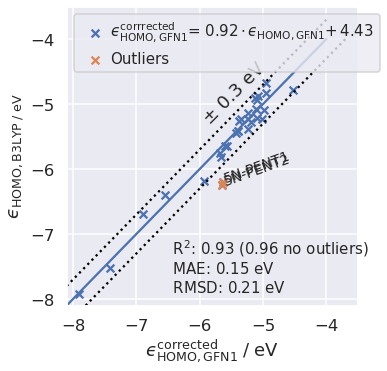

In [4]:
field_b3lyp="ehomo_b3lyp"
field_xtb_gfn1="ehomo_xtb_gfn1"


lr=RANSACRegressor(min_samples=20, residual_threshold=0.3)
lr.fit(df_typical[field_xtb_gfn1].values.reshape(-1, 1), 
       df_typical[field_b3lyp].values.reshape(-1, 1))
coef_=float(lr.estimator_.coef_)
intercept_=float(lr.estimator_.intercept_)
print('Coef {}, Intercept: {}'.format(coef_,intercept_))
print("R2",lr.score(df_typical[field_xtb_gfn1].values.reshape(-1, 1), 
               df_typical[field_b3lyp].values.reshape(-1, 1)))

inlier_mask = lr.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(5.5,5.5))

label='$ϵ_\mathrm{{HOMO,GFN1}}^{\mathrm{corrrected}}$= ' + '{0:2.2f}'.format(coef_) + \
      '$\,\mathrm{\cdot}\,ϵ_\mathrm{{HOMO,GFN1}}$' + '$+\,${0:2.2f}'.format(intercept_)

plt.scatter(lr.predict( df_typical[field_xtb_gfn1].values.reshape(-1, 1) ) , 
            df_typical[field_b3lyp].values.reshape(-1, 1), 
                       label=label, s=60, marker='x')
plt.scatter(lr.predict( df_typical.iloc[outlier_mask][field_xtb_gfn1].values.reshape(-1, 1) ) , 
            df_typical[field_b3lyp].iloc[outlier_mask].values.reshape(-1, 1), 
                       s=60, marker='x', label='Outliers')

df_outliers=df_typical.iloc[outlier_mask]

for i,row in df_outliers.iterrows():
    plt.text(lr.predict(np.array([row[field_xtb_gfn1]]).reshape(-1, 1)), row[field_b3lyp], 
             row.Name_system, fontsize=14, rotation=20)


r2=r2_score( df_typical[field_b3lyp].tolist(),
             np.squeeze(lr.predict(df_typical[field_xtb_gfn1].values.reshape(-1, 1))) )
r2_nooutliers=r2_score( df_typical.iloc[inlier_mask][field_b3lyp].tolist(),
             np.squeeze(lr.predict(df_typical.iloc[inlier_mask][field_xtb_gfn1].values.reshape(-1, 1))) )

mae=mean_absolute_error( df_typical[field_b3lyp].tolist(),
             np.squeeze(lr.predict(df_typical[field_xtb_gfn1].values.reshape(-1, 1))) )

rmsd=np.sqrt(mean_squared_error( df_typical[field_b3lyp].tolist(),
             np.squeeze(lr.predict(df_typical[field_xtb_gfn1].values.reshape(-1, 1))) ))


plt.text(-6.5,-7.9,' $\mathrm{R^2}$: %2.2f (%2.2f no outliers) \n $\mathrm{MAE}$: %2.2f eV \n $\mathrm{RMSD}$: %2.2f eV' % (r2, r2_nooutliers,mae,rmsd), 
         fontsize=15)

print('No out', r2_nooutliers)

plt.plot( (-4,-8.1), (-4,-8.1) )
plt.plot((-3.7,-7.8),(-4,-8.1), c='black', ls=':')
plt.plot((-4,-8.1),(-3.7,-7.8), c='black', ls=':')    
plt.xlabel('$ϵ_{\mathrm{HOMO, GFN1}}^{\mathrm{corrected}}\; /\;  \mathrm{eV}$')
plt.ylabel('$ϵ_\mathrm{{HOMO, B3LYP}\; /\; eV}$')

plt.xlim(-8.1,-3.5)
plt.ylim(-8.1,-3.5)
plt.text(-6.,-5.3,'± 0.3 eV', rotation=45)
plt.legend(fontsize=15, loc='upper left',handletextpad=0.0)

plt.tight_layout()
plt.savefig('SI_figures/Correlation_plot_HOMO_b3lyp_gfn1.pdf')
plt.show()